In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

<h2>Data Cleansing
    <h4>In this section, we import the dataset and correct any problems that could interfere with our anaylisis. This includes: <br> 
        <ul>
<li>Removing unnecessary columns</li>
<li>Ensuring that missing values are filled and extreme outliers are recognized</li>
<li>Checking that data types fit our needs</li>
        </ul>

In [171]:
path="/Users/ben/Desktop/supermarket_sales - Sheet1.csv"
ds=pd.read_csv(path)
print(ds.head())
print(ds.dtypes)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [159]:
ds.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

<h4>There is only 1 'Branch' for each 'City', so we will remove the 'Branch' column as it is redundant. <br> We will remove the 'gross margin percentage' column as well. It has the same value for every row so it does not provide actionable information. <br>The "Tax" column represents a predetermined and un-changeable percentage. So we don't need that column either.

In [172]:
#removes unwanted columns and checks for empty cells
def basic_data_cleansing (cols_to_drop):
    global clean_ds
    clean_ds=ds.drop(cols_to_drop, 1)
    check_na=clean_ds.isna().sum()
    print("New Column List and # of emtpy cells\n\n",check_na)
basic_data_cleansing(['Branch','gross margin percentage','Tax 5%'])


New Column List and # of emtpy cells

 Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64


In [173]:
#converts'Date' and 'Time' to pandas datetime dtype.
clean_ds['Date']=pd.to_datetime(clean_ds['Date'])
clean_ds['Time']=pd.to_datetime(clean_ds['Time'])
print(clean_ds.dtypes)
print(clean_ds.head())


Invoice ID               object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object
    Invoice ID       City Customer type  Gender            Product line  \
0  750-67-8428     Yangon        Member  Female       Health and beauty   
1  226-31-3081  Naypyitaw        Normal  Female  Electronic accessories   
2  631-41-3108     Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176     Yangon        Member    Male       Health and beauty   
4  373-73-7910     Yangon        Normal    Male       Sports and travel   

   Unit price  Quantity     Total       Date                Time      Payment  \
0     

<h2>Insights 
        

<h3> I created a function here that I use throughout the rest of the project to group sales by variables.

In [187]:
#Creates a function that will be used to explore correlations between sales (sum and average) and transaction variables.
def groupfunc (c1, c2, calc):
    return(pd.DataFrame(clean_ds.groupby([c1])[c2].agg(calc)))
#one example of use case for this function
sales_by_date = groupfunc ('Date', 'Total', 'sum')
print(sales_by_date) 

                Total
Date                 
2019-01-01  4745.1810
2019-01-02  1945.5030
2019-01-03  2078.1285
2019-01-04  1623.6885
2019-01-05  3536.6835
...               ...
2019-03-26  1962.5130
2019-03-27  2902.8195
2019-03-28  2229.4020
2019-03-29  4023.2430
2019-03-30  4487.0595

[89 rows x 1 columns]


In [188]:
sales_by_gender=clean_ds.groupby('Gender')['Total'].agg('sum')
print(sales_by_gender)

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

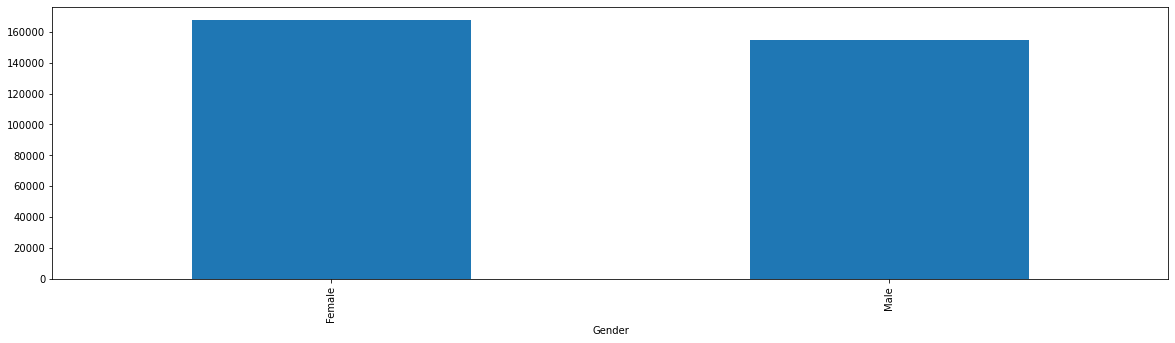

In [182]:
sales_by_gender.plot.bar()
plt.show

In [118]:
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    print(pd.DataFrame(groupfunc(col,'Total','sum')))
    

             Total
Gender            
Female  167882.925
Male    155083.824
                  Total
Payment                
Cash         112206.570
Credit card  100767.072
Ewallet      109993.107
                    Total
Customer type            
Member         164223.444
Normal         158743.305
                 Total
City                  
Mandalay   106197.6720
Naypyitaw  110568.7065
Yangon     106200.3705
                             Total
Product line                      
Electronic accessories  54337.5315
Fashion accessories     54305.8950
Food and beverages      56144.8440
Health and beauty       49193.7390
Home and lifestyle      53861.9130
Sports and travel       55122.8265


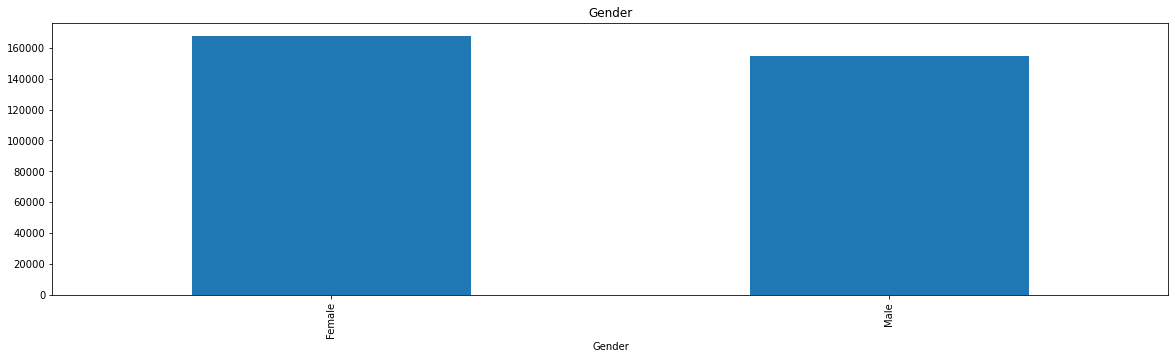

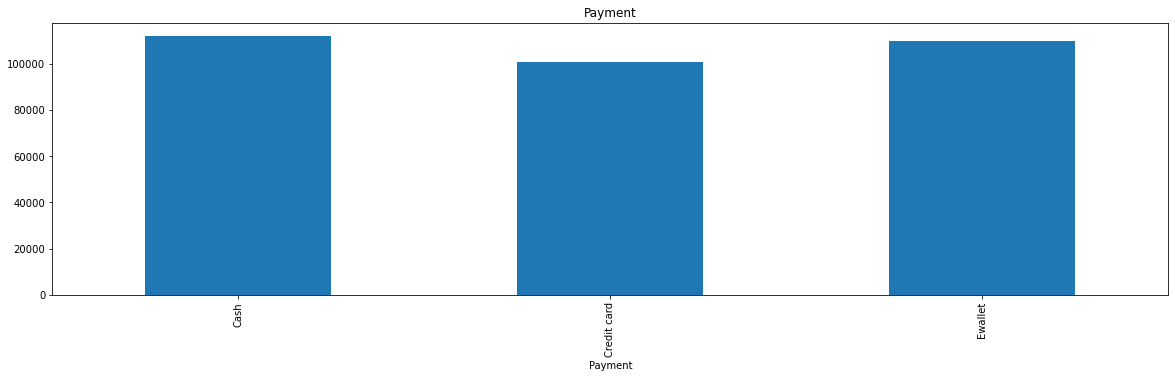

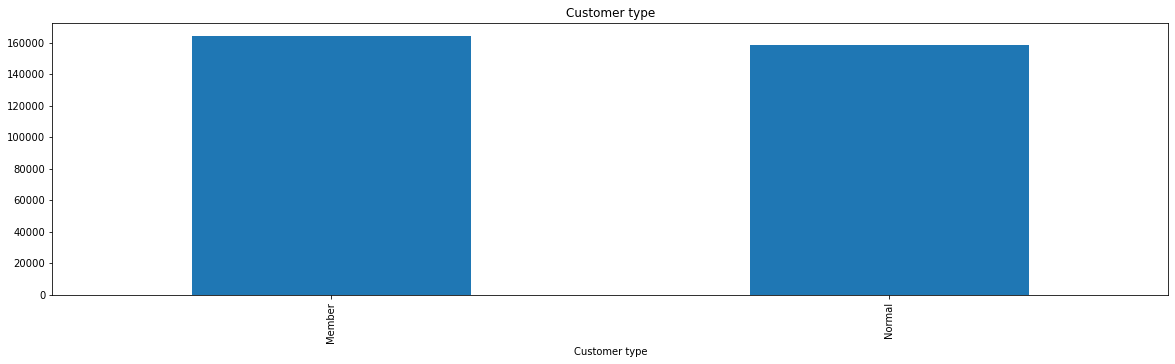

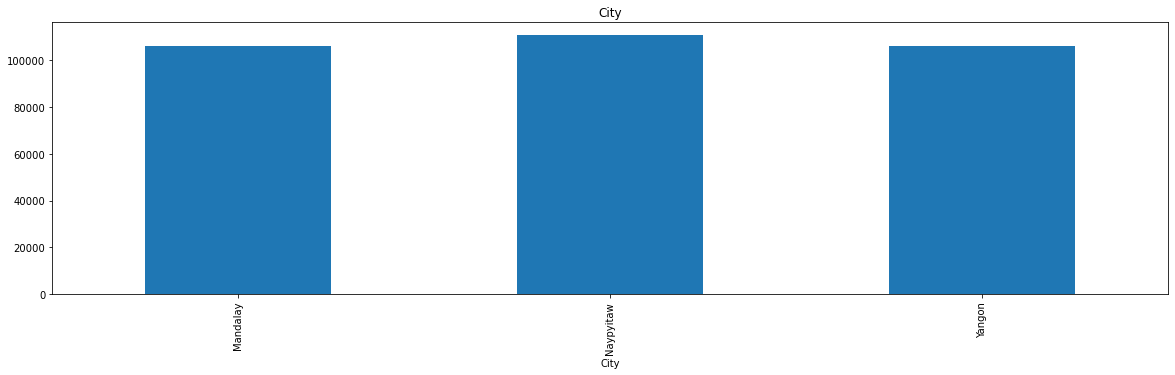

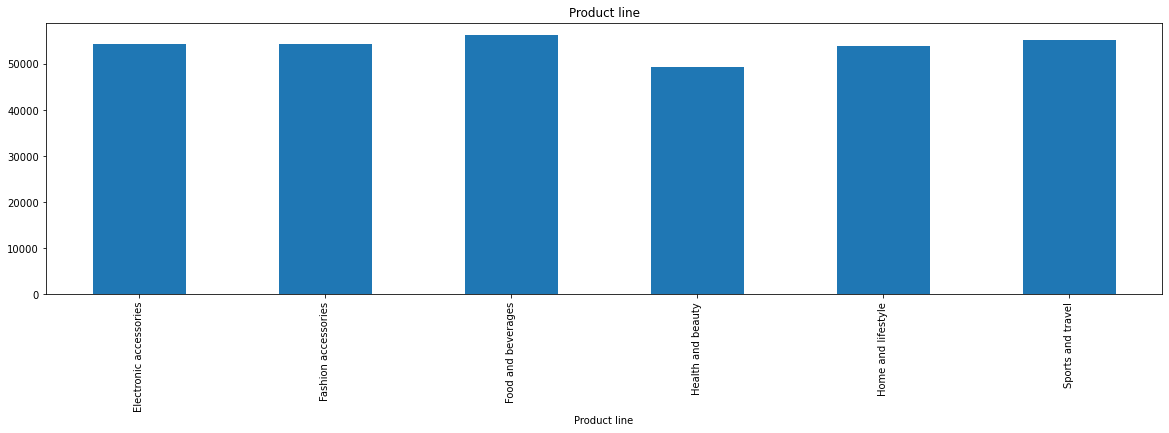

In [183]:
#Bar plots for category sales totals.
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    (groupfunc(col, 'Total','sum')).plot.bar()#Looping through every item in the dataframe.
    plt.title(col)
    plt.show()

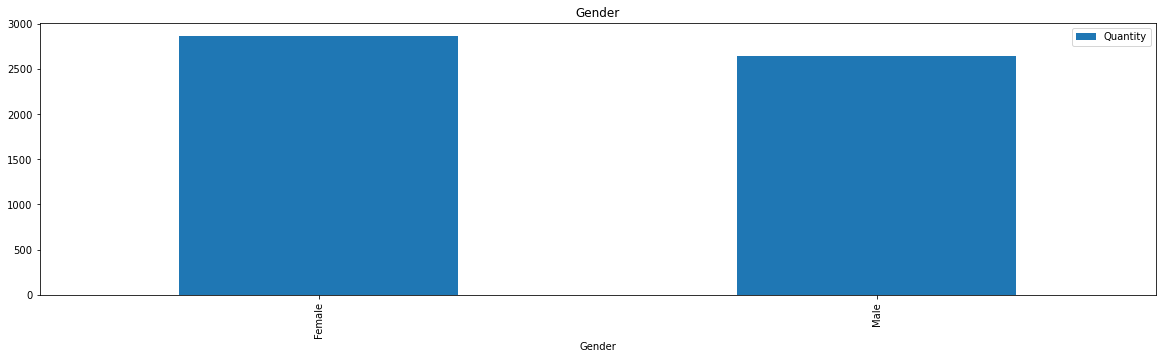

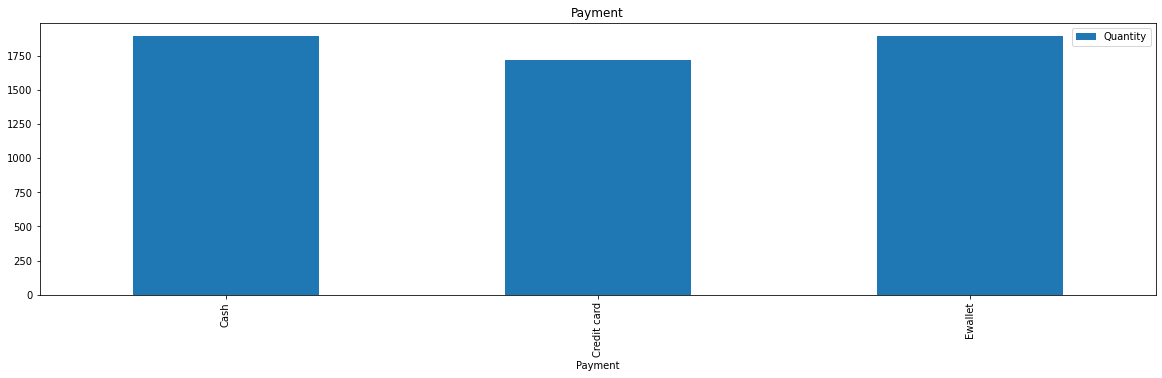

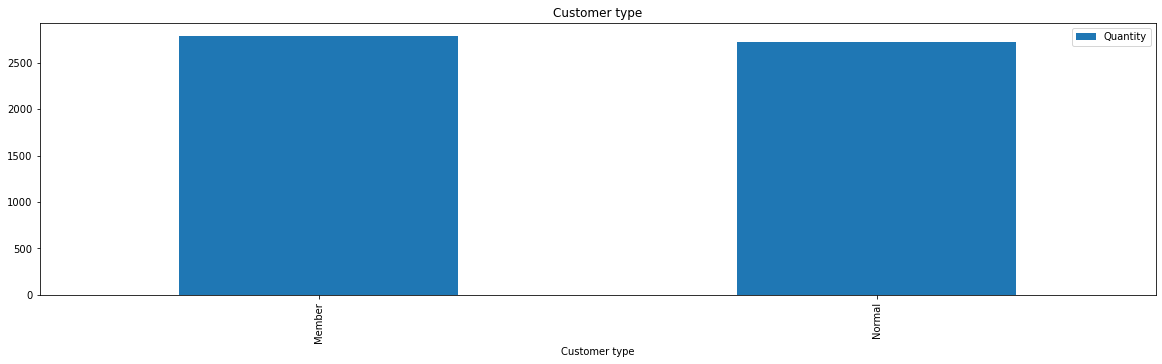

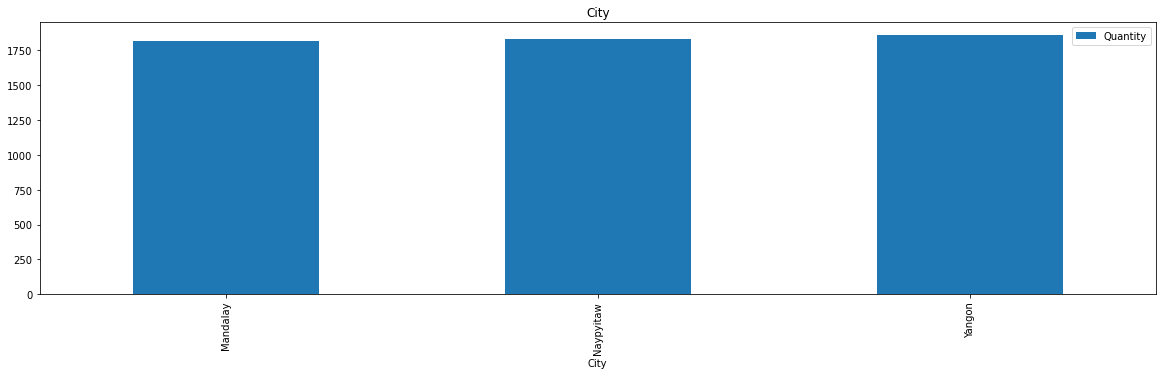

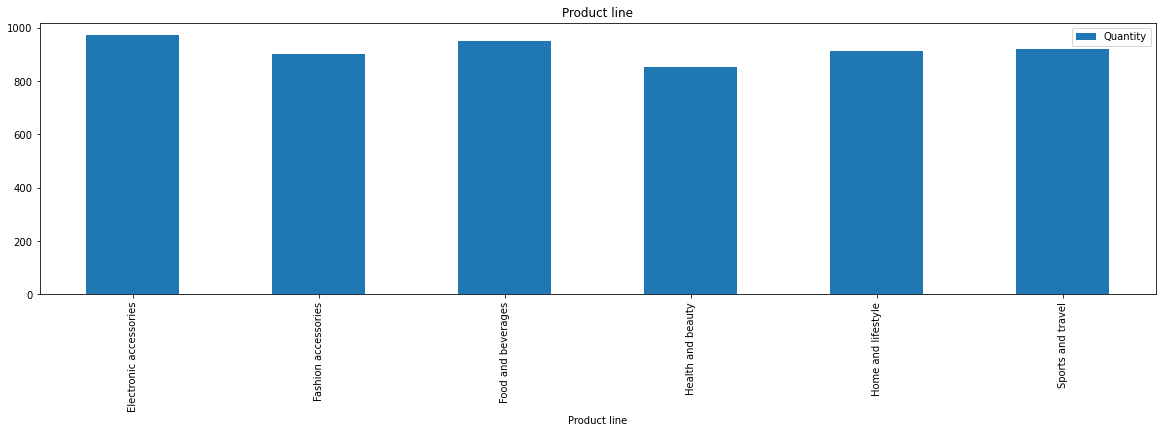

In [254]:
#Bar Plots for category Quantity totals
quant_cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in quant_cats_to_plot:
    (groupfunc(col, 'Quantity','sum')).plot.bar()#Looping through every item in the dataframe.
    plt.title(col)
    plt.show()

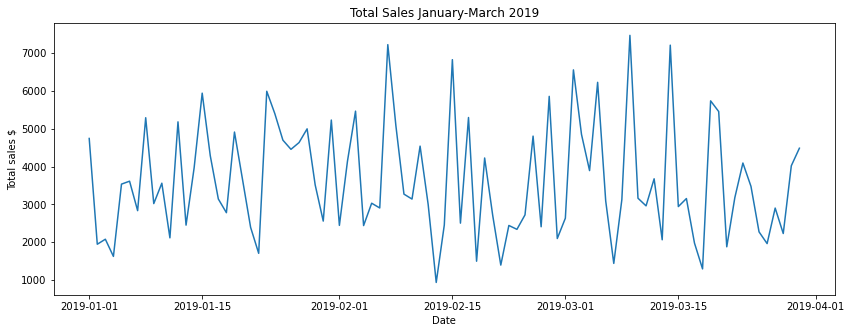

In [13]:
plt.figure(figsize=(14, 5))
total_sales_line = plt.plot(sales_by_date)
plt.title('Total Sales January-March 2019')
plt.xlabel('Date')
plt.ylabel('Total sales $')
plt.show()

<h3>The line plot above does not suggest any clear trend in sales over this time period.
   <br>So lets see if grouping sales by product line gives any new results.

Text(0.5, 1.0, 'Total sales grouped by product line')

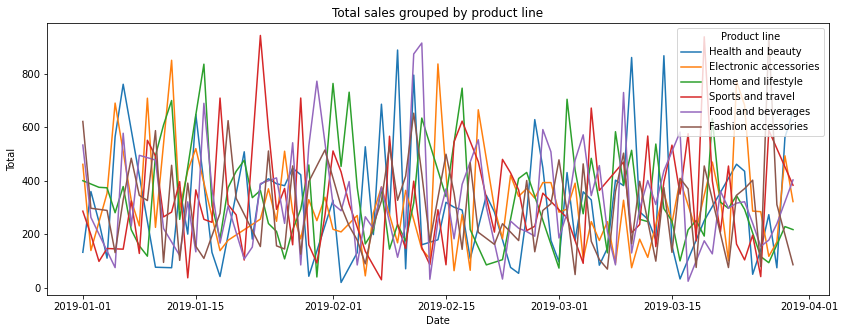

In [217]:
plt.figure(figsize=(14, 5))
day_totals=groupfunc('Date', 'Total','sum')
sns.lineplot(x="Date", y="Total", hue="Product line", data=clean_ds, ci=None)
#day_totals.plot()
plt.title('Total sales grouped by product line')


<h4> Do males and females have different spending patterns?

              Product line  Gender       Total
0   Electronic accessories  Female  27102.0225
1   Electronic accessories    Male  27235.5090
2      Fashion accessories  Female  30437.4000
3      Fashion accessories    Male  23868.4950
4       Food and beverages  Female  33170.9175
5       Food and beverages    Male  22973.9265
6        Health and beauty  Female  18560.9865
7        Health and beauty    Male  30632.7525
8       Home and lifestyle  Female  30036.8775
9       Home and lifestyle    Male  23825.0355
10       Sports and travel  Female  28574.7210
11       Sports and travel    Male  26548.1055


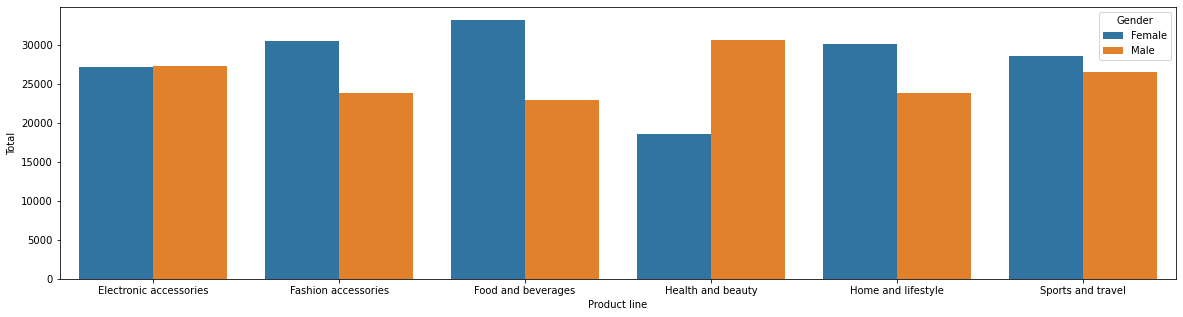

In [211]:

df=pd.DataFrame(clean_ds.groupby(['Product line', 'Gender'])['Total'].agg('sum'))
df=df.reset_index()
sns.barplot(x="Product line", y="Total", hue="Gender", data=df, ci=None)
print(df)


In [15]:
sum_sales_by_product = groupfunc("Product line", "Total", "sum")
avg_sales_by_product = groupfunc("Product line", "Total", "mean")
print('Sum Sales by Product\n', sum_sales_by_product, '\n\nMean Sales by Product\n',avg_sales_by_product)

Sum Sales by Product
 Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64 

Mean Sales by Product
 Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64


In [253]:
#looking at variance in mean sales for each categorical variable. 
cats_to_plot=['Gender','Payment','Customer type','City','Product line']
mylist=[]
for i in range(0,5):
    print(i)
    mylist[i]=int(np.var(groupfunc(cats_to_plot[i],'Total','mean')))
    print(mylist[i]," Variance:")
#plt.bar(cats_to_plot,vars)
plt.show()  



0


IndexError: list assignment index out of range

In [252]:
mylist=[]
for x in range(0, 5):
  print(x)
  mylist.append(int(np.var(groupfunc(cats_to_plot[x],'Total','mean'))))

0
1
2
3
4


In [210]:
mylist

[147, 9, 23, 107, 100]

<h4> The data set does not include the days of the week so we will extraxt that from the date column here. Then we can see if some days are more profitable than others.

In [226]:
#Creates a new column for day of the week.
clean_ds['day_of_week']=clean_ds['Date'].dt.day_name()
print(clean_ds['day_of_week'])

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_of_week, Length: 1000, dtype: object


In [246]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = clean_ds.groupby(['day_of_week']).sum().reindex(cats) 
print(df_weekday)

             Unit price  Quantity       Total      cogs  gross income  Rating
day_of_week                                                                  
Monday          7216.00       638  37899.0780  36094.36     1804.7180   894.2
Tuesday         8664.28       862  51482.2455  49030.71     2451.5355  1106.5
Wednesday       7688.35       800  43731.1350  41648.70     2082.4350   973.2
Thursday        7860.35       755  45349.2480  43189.76     2159.4880   950.8
Friday          7658.52       758  43926.3405  41834.61     2091.7305   983.6
Saturday        9333.74       919  56120.8095  53448.39     2672.4195  1131.9
Sunday          7250.89       778  44457.8925  42340.85     2117.0425   932.5


<AxesSubplot:xlabel='day_of_week'>

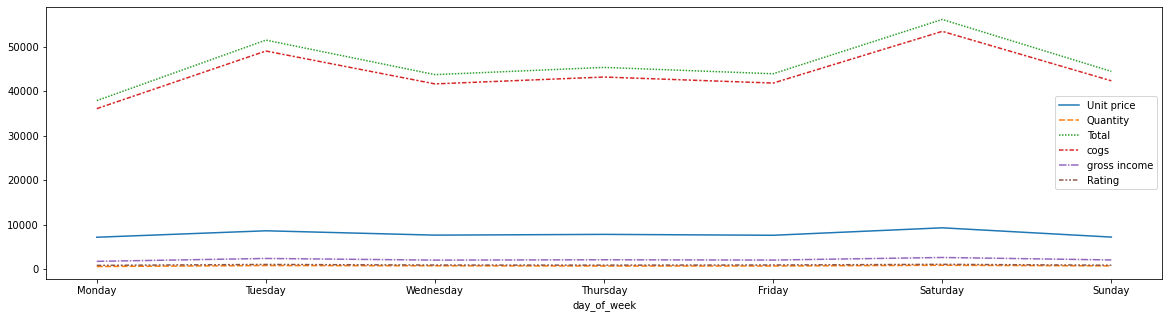

In [251]:
sns.lineplot(data=df_weekday, ci=None)